In [9]:
%load_ext autoreload
%autoreload 2
%aimport -c cutils_ext  # Prevent autoreload from trying to reload `cutils_ext`

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from surv_optimizer.db_utils.multi_dataset_model import MusicService
from surv_optimizer.data_processing.DataFitting import SurvivalModelTester
import warnings

warnings.filterwarnings("ignore",
                        message="Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples.*")
warnings.filterwarnings("ignore",
                        message="The effect of Potentials on other parameters is ignored during prior predictive sampling.*")
warnings.filterwarnings("ignore",
                        message=" The effect of Potentials on other parameters is ignored during prior predictive sampling.*")
warnings.filterwarnings("ignore",
                        message="rcParams['plot.max_subplots']*")

# Suppress specific UserWarnings related to tight_layout
with warnings.catch_warnings():
    warnings.simplefilter("ignore", UserWarning)
plt.tight_layout()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 640x480 with 0 Axes>

In [10]:
music_data = MusicService().get_music_data()
music_data.tracks.drop(pd.to_datetime('2023-03-17'), inplace=True)  #Дырка в данных

File snowflake_tracks_rap_cavier.csv loaded successfully
File snowflake_artists_37.csv loaded successfully
File snowflake_genre_6.csv loaded successfully
File snowflake_label_26.csv loaded successfully
File snowflake_playlist_8.csv loaded successfully


In [11]:
music_data.tracks.dtypes

isrc                 object
playlist_id          object
info                 object
streams_playlist      int64
followers             int64
spotify_streams     float64
position              int64
event                 int64
artist_id            object
genre_id              int64
release_date         object
featured_artist       int64
explicit              int64
label_id              int64
dtype: object

In [12]:
service = MusicService()
a = service.get_merged_data(music_data)
#a.query("isrc == 'USUYG1412332'")  #USUYG1412332
data = service.get_featured_dataset()
data.drop(['explicit', 'featured_artist'], axis=1, inplace=True)
data

,isrc,playlist_id,days_on_playlist,days_since_release,streams_lag_1,streams_lag_7,position_lag_1,position_lag_7,playlist_cumulative_streams,playlist_growth_rate,...,track_artist_ratio,position_changes,streams_followers_interaction,artist_count,age_distinctiveness,instrumentalness_distinctiveness,valence_distinctiveness,explicit_distinctiveness,streams_popularity_ratio,top_track_contribution_ratio
0,USAT22205424,37i9dQZF1DWYs83FtTMQFw,154,1,75.0,61.0,71.0,66.0,3847,-0.046386,...,0.105066,31,8853443483,1,0.117634,0.006657,0.037995,0.818021,0.000134,0.093839
1,USAT22305462,37i9dQZF1DWYs83FtTMQFw,245,8,142.0,258.0,75.0,61.0,12934,0.003216,...,0.115832,46,29766165326,1,0.117634,0.006657,0.037995,0.818021,0.000063,0.034483
2,USAT22305462,6UeSakyzhiEt4NB3UAd6NQ,23,101,4.0,0.0,97.0,0.0,24,-0.141234,...,0.002365,4,43278504,1,0.129437,0.013471,0.029603,0.818021,0.000004,0.458333
3,USAT22306272,37i9dQZF1DWYs83FtTMQFw,35,22,450.0,584.0,28.0,19.0,4819,-0.108591,...,0.197946,10,11090393591,1,0.117634,0.006657,0.037995,-0.181979,0.000260,0.133223
4,USAT22306274,2NoR0KhNZ8oZnC3HoNt2FV,211,239,11.0,27.0,72.0,47.0,501,0.419684,...,0.010222,15,114798639,1,0.942644,-0.015419,0.011211,-0.181979,0.000284,0.149701
5,USAT22307481,37i9dQZF1DWYs83FtTMQFw,69,1,1.0,669.0,42.0,26.0,6750,-0.069553,...,0.168714,17,15534375750,1,0.117634,0.006657,0.037995,-0.181979,0.000293,0.105333
6,USAT22307481,6UeSakyzhiEt4NB3UAd6NQ,0,18,0.0,0.0,0.0,0.0,8,0.000000,...,0.003601,1,14426168,1,0.129437,0.013471,0.029603,-0.181979,0.000004,1.000000
7,USAT22307525,37i9dQZEVXbKCF6dqVpDkS,3,5,2.0,0.0,22.0,0.0,3,-0.250000,...,0.000636,2,2751039,1,0.156473,0.065909,-0.057070,-0.181979,0.000002,0.666667
8,USAT22307525,37i9dQZF1DWYs83FtTMQFw,28,3,895.0,1607.0,4.0,4.0,6752,-0.169128,...,0.346546,8,15538978528,1,0.117634,0.006657,0.037995,-0.181979,0.000698,0.238004
9,USUYG1371451,37i9dQZF1DWYs83FtTMQFw,21,0,1917.0,0.0,38.0,0.0,11959,-0.145494,...,0.016001,6,27522311051,3,0.117634,0.006657,0.037995,0.818021,0.000985,0.215570


In [13]:
# Initialize with DataFrame and list of predictors
fitting_data = SurvivalModelTester(data)
fitting_data.preprocess_data(minmax=True)
# Fit models and extract significant predictors
#b = fitting_data.get_preprocessed_data()
#b.isnull().any()
fitting_data.fit_models_and_get_significant_predictors()
results = fitting_data.get_significance()

Data preprocessing complete.


C:\Users\runet\miniconda3\envs\pymc_new\lib\site-packages\statsmodels\duration\hazard_regression.py:828: RuntimeWarning: invalid value encountered in divide
  hess += m*(xp2 / xp0  - np.outer(xp1, xp1) / xp0**2)
C:\Users\runet\miniconda3\envs\pymc_new\lib\site-packages\statsmodels\duration\hazard_regression.py:714: RuntimeWarning: invalid value encountered in divide
  grad += (exog_s[ix,:] - xp1 / xp0).sum(0)


cox_significant: []
weibull_significant: ['age_distinctiveness', 'artist_count', 'days_since_release', 'engagement_ratio', 'instrumentalness_distinctiveness', 'last_position', 'peak_position', 'position_changes', 'position_lag_1', 'skewness_streams', 'stream_acceleration', 'streams_popularity_ratio', 'top_track_contribution_ratio', 'track_artist_ratio', 'valence_distinctiveness', 'variance_streams', 'Intercept']
combined_significant: ['position_lag_1', 'peak_position', 'streams_popularity_ratio', 'Intercept', 'valence_distinctiveness', 'track_artist_ratio', 'skewness_streams', 'instrumentalness_distinctiveness', 'variance_streams', 'days_since_release', 'artist_count', 'stream_acceleration', 'top_track_contribution_ratio', 'age_distinctiveness', 'position_changes', 'engagement_ratio', 'last_position']


In [15]:
df_data = SurvivalModelTester(data)
df_data.preprocess_data()
df = df_data.get_preprocessed_data()
df['event_observed'] = df['event_observed'].astype(bool)
event_times = df['days_on_playlist'].values
censored = ~df['event_observed'].values  # Assuming event_observed == 1 means event occurred
df.loc[df['days_on_playlist'] == 0, 'days_on_playlist'] += 1

Data preprocessing complete.


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

preds = ['days_since_release', 'playlist_cumulative_streams', 'stream_acceleration', 'valence_distinctiveness',
         'artist_count',
         'skewness_streams', 'engagement_ratio', 'position_lag_7', 'top_track_contribution_ratio',
         'artist_genre_performance',
         'explicit_distinctiveness', 'relative_popularity_to_genre', 'position_changes', 'last_position',
         'variance_streams']
X = df[preds]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,days_since_release,2.144967
1,playlist_cumulative_streams,5.618175
2,stream_acceleration,3.290222
3,valence_distinctiveness,1.785433
4,artist_count,1.517897
5,skewness_streams,2.324788
6,engagement_ratio,4.253876
7,position_lag_7,5.863394
8,top_track_contribution_ratio,4.316850
9,artist_genre_performance,2.281190


In [18]:
from surv_optimizer.models.MCModels import WeibullAFTModel, LogLogisticAFTModel, LogNormalAFTModel, \
    GeneralizedGammaAFTModel

#preds = ['variance_streams', 'artist_genre_performance', 'artist_label_performance', 'position_changes']

# Define time intervals for models requiring intervals
max_time = np.max(event_times)
interval_bounds = np.linspace(0, max_time + 1, num=10)  # Adjust number of intervals as needed
intervals = np.arange(len(interval_bounds) - 1)

coords = {
    "obs_id": np.arange(len(df)),
    "obs_uncens": np.arange(np.sum(~censored)),
    "preds": preds,
    "intervals": intervals,
}
models = {
    "Weibull": WeibullAFTModel(df, preds, coords, censored, event_times),
    "LogLogistic": LogLogisticAFTModel(df, preds, coords, censored, event_times),
    "LogNormal": LogNormalAFTModel(df, preds, coords, censored, event_times),
    "GeneralizedGamma": GeneralizedGammaAFTModel(df, preds, coords, censored, event_times),
    #"CoxPH": CoxPHModel(df, preds, coords, censored, event_times, interval_bounds),
    #"Piecewise": PiecewiseExponentialModel(df, preds, coords, censored, event_times, interval_bounds),
    #"Flexible": FlexibleParametricModel(df, preds, coords, censored, event_times)
}

In [19]:
idata_dict = {}
for name, model_obj in models.items():
    print(f"Sampling {name} model...")
    model_obj.build_model()
    idata = model_obj.sample(model_obj.model)
    idata_dict[name] = idata

Sampling Weibull model...


Sampling: [beta, mu, sigma, y_obs]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))
Sampling: [y_obs]


Output()

Sampling: [beta, mu, sigma, y_obs]


Sampling LogLogistic model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.
C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))
Sampling: [y_obs]


Output()

Sampling: [beta, mu, sigma, y_obs]


Sampling LogNormal model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))
Sampling: [y_obs]


Output()

Sampling: [beta, kappa, mu, sigma]


Sampling GeneralizedGamma model...


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, mu, sigma, kappa]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Evaluating Weibull model...
Evaluating LogLogistic model...
Evaluating LogNormal model...
Evaluating GeneralizedGamma model...


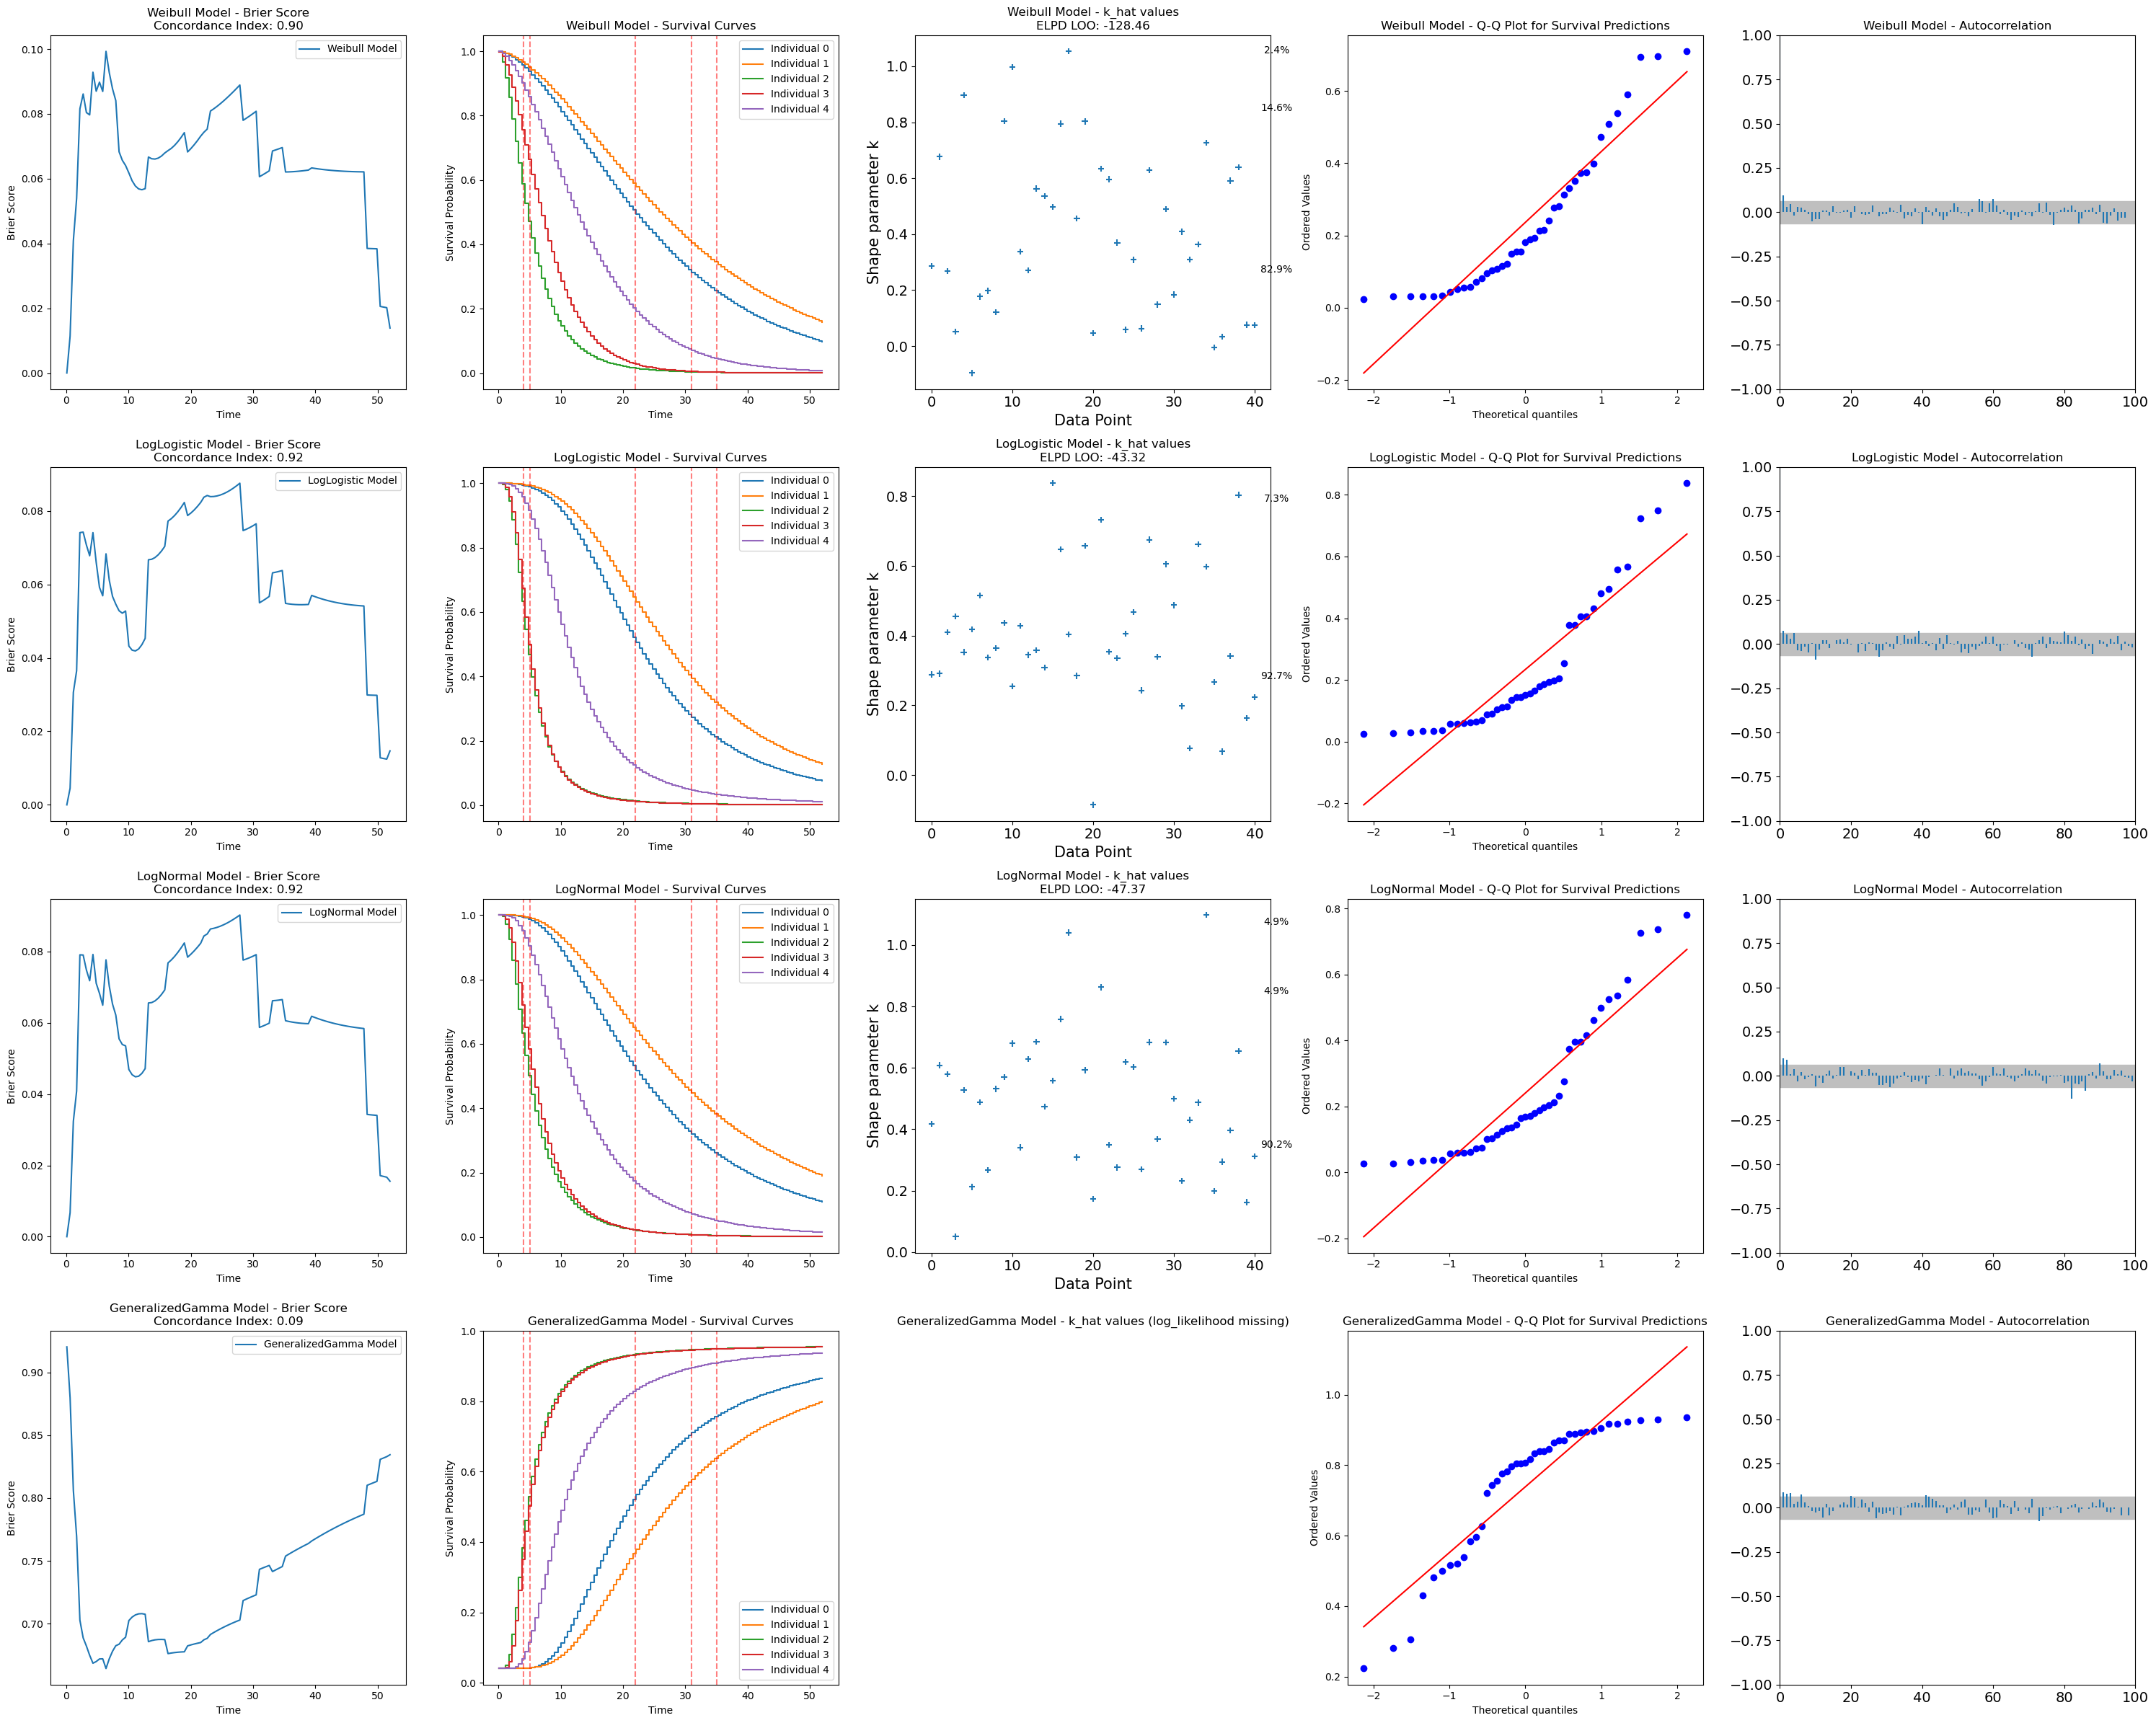

In [20]:
from surv_optimizer.utils.MCModelUtils import evaluate_and_plot_all_models

# Times at which to evaluate survival probabilities
times = np.linspace(0.1, max_time, 100)

# Call the function with your models, inference data, and time points
evaluate_and_plot_all_models(models, idata_dict, times)

In [58]:
from surv_optimizer.utils.MCModelUtils import stepwise_selection
from surv_optimizer.models.MCModels import LogNormalAFTModel

possible_preds = ['days_since_release',
                  'streams_lag_1', 'streams_lag_7', 'position_lag_1', 'position_lag_7',
                  'playlist_cumulative_streams', 'playlist_growth_rate',
                  'playlist_streams_rolling_avg', 'stream_acceleration', 'peak_position',
                  'last_position', 'relative_popularity_to_genre', 'mean_streams',
                  'variance_streams', 'skewness_streams', 'kurtosis_streams',
                  'engagement_ratio', 'artist_genre_performance',
                  'artist_label_performance', 'track_artist_ratio', 'position_changes',
                  'streams_followers_interaction', 'artist_count']
# Coordinates and data
coords = {
    "obs_id": np.arange(len(df)),
    "obs_uncens": np.arange(np.sum(~censored)),
    "preds": possible_preds,
}
# Perform stepwise selection for the Generalized Gamma model
selected_preds, final_model_obj, final_idata = stepwise_selection(
    LogNormalAFTModel, df, possible_preds, coords, censored, event_times)

Testing predictor(s): ['days_since_release']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Selected predictor: days_since_release
Testing predictor(s): ['days_since_release', 'streams_lag_1']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor streams_lag_1 did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Selected predictor: streams_lag_7
Updated elpd_loo: -39.131551670196764
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_1']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor position_lag_1 did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Selected predictor: position_lag_7
Updated elpd_loo: -25.445114902466898
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Selected predictor: playlist_cumulative_streams
Updated elpd_loo: -23.142360375241225
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Selected predictor: playlist_growth_rate
Updated elpd_loo: -21.11656618095649
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'playlist_streams_rolling_avg']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor playlist_streams_rolling_avg did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Selected predictor: stream_acceleration
Updated elpd_loo: -15.608510396694063
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'peak_position']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor peak_position did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'last_position']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor last_position did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'relative_popularity_to_genre']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor relative_popularity_to_genre did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'mean_streams']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor mean_streams did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'variance_streams']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor variance_streams did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Selected predictor: skewness_streams
Updated elpd_loo: -15.11948657528232
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams', 'kurtosis_streams']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor kurtosis_streams did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams', 'engagement_ratio']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor engagement_ratio did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams', 'artist_genre_performance']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Selected predictor: artist_genre_performance
Updated elpd_loo: -7.422625062079796
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams', 'artist_genre_performance', 'artist_label_performance']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor artist_label_performance did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams', 'artist_genre_performance', 'track_artist_ratio']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor track_artist_ratio did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams', 'artist_genre_performance', 'position_changes']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Selected predictor: position_changes
Updated elpd_loo: -4.103081904564041
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams', 'artist_genre_performance', 'position_changes', 'streams_followers_interaction']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor streams_followers_interaction did not improve the model and was not selected.
Testing predictor(s): ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams', 'artist_genre_performance', 'position_changes', 'artist_count']


Output()

Output()

C:\Users\runet\PycharmProjects\surv_mcmc\surv_optimizer\utils\MCModels.py:66: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idata.extend(pm.sample_posterior_predictive(idata, model=model))


Predictor artist_count did not improve the model and was not selected.
Final selected predictors: ['days_since_release', 'streams_lag_7', 'position_lag_7', 'playlist_cumulative_streams', 'playlist_growth_rate', 'stream_acceleration', 'skewness_streams', 'artist_genre_performance', 'position_changes']
